# Plain vanilla Option Pricing

In [1]:
import sympy as sp

# 표준정규분포 누적확률밀도함수 (CDF)
N = lambda x: (1 / 2) * (1 + sp.erf(x / sp.sqrt(2)))

N(0),N(sp.oo)

(0.500000000000000, 1.00000000000000)

In [2]:
# 변수 정의
S0, K, r, sigma, T = sp.symbols('S0 K r sigma T')
d1 = (sp.ln(S0 / K) + (r + sigma**2 / 2) * T) / (sigma * sp.sqrt(T))
d2 = d1 - sigma * sp.sqrt(T)

# Black-Scholes 공식
C = S0 * N(d1) - K * sp.exp(-r * T) * N(d2)

# 결과 출력
C.simplify()

0.5*(K*(erf(sqrt(2)*(-2*T*r + T*sigma**2 - 2*log(S0/K))/(4*sqrt(T)*sigma)) - 1) + S0*(erf(sqrt(2)*(T*(2*r + sigma**2) + 2*log(S0/K))/(4*sqrt(T)*sigma)) + 1)*exp(T*r))*exp(-T*r)

In [3]:
# 델타 공식
sp.diff(C,S0)

-0.5*sqrt(2)*K*exp(-T*r)*exp(-(-sqrt(T)*sigma + (T*(r + sigma**2/2) + log(S0/K))/(sqrt(T)*sigma))**2/2)/(sqrt(pi)*S0*sqrt(T)*sigma) + 0.5*erf(sqrt(2)*(T*(r + sigma**2/2) + log(S0/K))/(2*sqrt(T)*sigma)) + 0.5 + 0.5*sqrt(2)*exp(-(T*(r + sigma**2/2) + log(S0/K))**2/(2*T*sigma**2))/(sqrt(pi)*sqrt(T)*sigma)

In [4]:
# 델타 공식 증명
expr=sp.diff(C,S0)-N(d1)
expr.simplify()

0

In [5]:
# (∂d1)/(∂S0 )
sp.diff(d1,S0)

1/(S0*sqrt(T)*sigma)

In [6]:
# 감마 공식
gamma=sp.diff(C,S0,2).simplify()
gamma

0.5*sqrt(2)*exp(-T*r**2/(2*sigma**2) - T*r/2 - T*sigma**2/8 - r*log(S0/K)/sigma**2 - log(S0/K)**2/(2*T*sigma**2))/(sqrt(pi)*K*sqrt(T)*sigma*(S0/K)**(3/2))

In [7]:
# 감마공식 검증
from sympy import sqrt, pi, exp, symbols

x=symbols('x')

# 표준정규분포 확률밀도함수 (PDF)
n = lambda x: (1 / sqrt(2*pi))*exp(-x**2/2)
expr=gamma-n(x)/(S0*sigma*sqrt(T))
expr.simplify()

sqrt(2)*(-K*(S0/K)**(3/2) + 1.0*S0*exp((-T**2*sigma**2*(4*r + sigma**2) - 4*T*r*(T*r + 2*log(S0/K)) + 4*T*sigma**2*x**2 - 4*log(S0/K)**2)/(8*T*sigma**2)))*exp(-x**2/2)/(2*sqrt(pi)*K*S0*sqrt(T)*sigma*(S0/K)**(3/2))

In [8]:
#(∂d1)/∂σ
sp.diff(d1,sigma)

sqrt(T) - (T*(r + sigma**2/2) + log(S0/K))/(sqrt(T)*sigma**2)

In [9]:
_.simplify()

(-T*r + T*sigma**2/2 - log(S0/K))/(sqrt(T)*sigma**2)

In [53]:
from math import log, sqrt, pi, exp
from scipy.stats import norm
import numpy as np

def d1(S, K, T, r, sigma):
    return (log(S / K) + (r + sigma ** 2 / 2) * T) / (sigma * sqrt(T))

def d2(S, K, T, r, sigma):
    return d1(S, K, T, r, sigma) - sigma * sqrt(T)

def bs_call(S, K, T, r, sigma):
    return S * norm.cdf(d1(S, K, T, r, sigma)) - K * exp(-r * T) * norm.cdf(d2(S, K, T, r, sigma))

def call_delta(S, K, T, r, sigma):
    return norm.cdf(d1(S, K, T, r, sigma))

def call_gamma(S, K, T, r, sigma):
    return norm.pdf(d1(S, K, T, r, sigma)) / (S * sigma * sqrt(T))

def call_vega(S, K, T, r, sigma): # 1% 변동성 민감도
    return 0.01 * (S * norm.pdf(d1(S, K, T, r, sigma)) * sqrt(T))

def call_theta(S, K, T, r, sigma): # 1 day 감소에 대한 민감도
    return (1/365) * (- (S * norm.pdf(d1(S, K, T, r, sigma)) * sigma) / (2 * sqrt(T)) \
                   - r * K * exp(-r * T) * norm.cdf(d2(S, K, T, r, sigma)))

def call_rho(S, K, T, r, sigma): # 1bp 변화에 대한 민감도
    return 0.0001 * ((K * T * exp(-r * T) * norm.cdf(d2(S, K, T, r, sigma))))

def bs_put(S, K, T, r, sigma):
    return K * exp(-r * T) - S + bs_call(S, K, T, r, sigma)

def put_delta(S, K, T, r, sigma):
    return -norm.cdf(-d1(S, K, T, r, sigma))

def put_gamma(S, K, T, r, sigma):
    return norm.pdf(d1(S, K, T, r, sigma)) / (S * sigma * sqrt(T))

def put_vega(S, K, T, r, sigma): # 1% 변동성 민감도
    return 0.01 * (S * norm.pdf(d1(S, K, T, r, sigma)) * sqrt(T))

def put_theta(S, K, T, r, sigma):  # 1 day 감소에 대한 민감도
    return (1/365) * (
        - (S * norm.pdf(d1(S, K, T, r, sigma)) * sigma) / (2 * np.sqrt(T))
        + r * K * np.exp(-r * T) * norm.cdf(-d2(S, K, T, r, sigma)))

def put_rho(S, K, T, r, sigma):
    return -0.0001 * (K * T * exp(-r * T) * norm.cdf(-d2(S, K, T, r, sigma)))

## 블랙숄즈 공식을 이용하여 기초자산의 현재가 100, 행사가 100, 잔여만기 1년인 콜옵션의 현재가를 추정하여라. (단, 무위험 이자율 5% p.a., 기초자산의 변동성 30% p.a.)

In [50]:
print('콜옵션의 현재가:',bs_call(100,100,1,0.05,0.3))
print('콜옵션의 델타:',call_delta(100,100,1,0.05,0.3))
print('콜옵션의 감마:',call_gamma(100,100,1,0.05,0.3))
print('콜옵션의 1% 베가:',call_vega(100,100,1,0.05,0.3))
print('콜옵션의 1day 세타:',call_theta(100,100,1,0.05,0.3))
print('콜옵션의 1bp 르호:',call_rho(100,100,1,0.05,0.3))

콜옵션의 현재가: 14.231254785985819
콜옵션의 델타: 0.6242517279060125
콜옵션의 감마: 0.012647764437231512
콜옵션의 1% 베가: 0.3794329331169454
콜옵션의 1day 세타: -0.0221950408136574
콜옵션의 1bp 르호: 0.004819391800461543


## 블랙숄즈 공식을 이용하여 기초자산의 현재가 100, 행사가 100, 잔여만기 1년인 풋옵션의 현재가를 추정하여라. (단, 무위험 이자율 5% p.a., 기초자산의 변동성 30% p.a.)

In [54]:
print('풋옵션의 현재가:',bs_put(100,100,1,0.05,0.3))
print('풋옵션의 델타:',put_delta(100,100,1,0.05,0.3))
print('풋옵션의 감마:',put_gamma(100,100,1,0.05,0.3))
print('풋옵션의 1% 베가:',put_vega(100,100,1,0.05,0.3))
print('풋옵션의 1day 세타:',put_theta(100,100,1,0.05,0.3))
print('풋옵션의 1bp 르호:',put_rho(100,100,1,0.05,0.3))

풋옵션의 현재가: 9.354197236057225
풋옵션의 델타: -0.37574827209398753
풋옵션의 감마: 0.012647764437231512
풋옵션의 1% 베가: 0.3794329331169454
풋옵션의 1day 세타: -0.009164500752003785
풋옵션의 1bp 르호: -0.004692902444545599


## 주가 path 생성하기

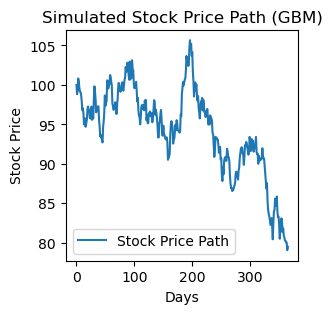

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# 파라미터 설정
S0 = 100    # 초기 주가
r = 0.05    # 무위험 이자율
sigma = 0.2 # 변동성
T = 1       # 기간 (년)
N = 365     # 시뮬레이션 일수 (하루 단위)
dt = T / N  # 시간 간격

# 주가 경로 생성
np.random.seed(111)
W = np.random.randn(N)  # 표준 정규분포 난수
S = np.zeros(N+1)  
S[0] = S0

for t in range(1, N+1):
    S[t] = S[t-1] * np.exp((r - 0.5 * sigma**2) * dt\
                           + sigma * np.sqrt(dt) * W[t-1])

# 결과 시각화
plt.figure(figsize=(3,3))
plt.plot(S, label="Stock Price Path")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.title("Simulated Stock Price Path (GBM)")
plt.legend()
plt.show()

In [14]:
S[0],S[-1]

(100.0, 79.49878752360846)

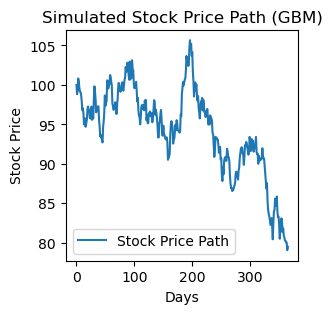

In [15]:
# for문을 사용하지 않고 작성

import numpy as np
import matplotlib.pyplot as plt

# 파라미터 설정
S0 = 100    # 초기 주가
r = 0.05    # 무위험 이자율
sigma = 0.2 # 변동성
T = 1       # 기간 (년)
N = 365     # 시뮬레이션 일수 (하루 단위)
dt = T / N  # 시간 간격

# 주가 경로 생성
np.random.seed(111)
W = np.random.randn(N)  # 표준 정규분포 난수
S = np.zeros(N+1)  

# log(S)벡터 만들기
lnS=(r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * W
lnS=np.insert(lnS,0,np.log(S0)) #초기값 추가

# 누적합 구하기
S=np.exp(np.cumsum(lnS))

# 결과 시각화
plt.figure(figsize=(3,3))
plt.plot(S, label="Stock Price Path")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.title("Simulated Stock Price Path (GBM)")
plt.legend()
plt.show()


In [16]:
S[0],S[-1]

(100.00000000000004, 79.49878752360797)

## 몬테카를로 시뮬레이션을 이용하여 기초자산의 현재가 100, 행사가 100, 잔여만기 1년인 콜옵션의 현재가를 추정하여라. (단, 무위험 이자율 5% p.a., 기초자산의 변동성 30% p.a.)

In [24]:
import numpy as np

# 파라미터 설정
S0 = 100      # 현재 주가
K = 100       # 행사가격
T = 1         # 만기 (년 단위)
r = 0.05      # 무위험 이자율 (연간)
sigma = 0.3   # 변동성 (연간)
n_sim = 100000  # 몬테카를로 시뮬레이션 횟수

# 난수 생성 (표준 정규분포)
Z = np.random.randn(n_sim)

# 몬테카를로 시뮬레이션 (기하 브라운 운동 사용)
ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)

# 콜옵션의 페이오프 계산
payoff = np.maximum(ST - K, 0)

# 현재가치 할인 적용 (할인율: e^(-rT))
call_price = np.exp(-r * T) * np.mean(payoff)

# 결과 출력
print(f"몬테카를로 시뮬레이션 기반 콜옵션 가격: {call_price:.4f}")
print(f"블랙숄즈 공식 기반 콜옵션 가격: {bs_call(100,100,1,0.05,0.3):.4f}")

몬테카를로 시뮬레이션 기반 콜옵션 가격: 14.2468
블랙숄즈 공식 기반 콜옵션 가격: 14.2313


## 몬테카를로 시뮬레이션을 이용하여 기초자산의 현재가 100, 행사가 100, 잔여만기 1년인 콜옵션의 Greeks를 추정하여라. (단, 무위험 이자율 5% p.a., 기초자산의 변동성 30% p.a.)

In [36]:
# 콜옵션 함수 작성

def MC_Call(S,K,T,r,sigma,n_sim=100000):
    import numpy as np
    # 난수 생성 (표준 정규분포)
    np.random.seed(11)
    Z = np.random.randn(n_sim)
    # 만기가격 도출
    ST = S * np.exp((r - 0.5 * sigma**2) * T\
                     + sigma * np.sqrt(T) * Z)
    # 콜옵션의 페이오프 계산
    payoff = np.maximum(ST - K, 0)
    # 현재가치 할인 적용 (할인율: e^(-rT))
    call_price = np.exp(-r * T) * np.mean(payoff)
    return call_price

In [37]:
MC_Call(100,100,1,0.05,0.3)

14.34948691846546

In [55]:
# Delta (Δ)
S,K,T,r,sigma=100,100,1,0.05,0.3
eps=S*0.01
C_plus = MC_Call(S + eps, K, T, r, sigma)
C_minus = MC_Call(S - eps, K, T, r, sigma)
Delta = (C_plus - C_minus) / (2 * eps)

# 결과 출력
print(f"몬테카를로 시뮬레이션 기반 콜옵션 델타: {Delta:.4f}")
print(f"블랙숄즈 공식 기반 콜옵션 델타: {call_delta(100,100,1,0.05,0.3):.4f}")

몬테카를로 시뮬레이션 기반 콜옵션 델타: 0.6269
블랙숄즈 공식 기반 콜옵션 델타: 0.6243


In [56]:
# Gamma (Γ)
eps=S*0.01
C_0 = MC_Call(S, K, T, r, sigma)
Gamma = (C_plus - 2 * C_0 + C_minus) / (eps ** 2)
# 결과 출력
print(f"몬테카를로 시뮬레이션 기반 콜옵션 감마: {Gamma:.4f}")
print(f"블랙숄즈 공식 기반 콜옵션 감마: {call_gamma(100,100,1,0.05,0.3):.4f}")

몬테카를로 시뮬레이션 기반 콜옵션 감마: 0.0124
블랙숄즈 공식 기반 콜옵션 감마: 0.0126


In [57]:
# Vega (V)
eps=sigma*0.01
C_sigma_plus = MC_Call(S, K, T, r, sigma + eps)
C_sigma_minus = MC_Call(S, K, T, r, sigma - eps)
Vega = (C_sigma_plus - C_sigma_minus) / (2 * eps)
Vega = 0.01*Vega # 1% 베가로 변환
# 결과 출력
print(f"몬테카를로 시뮬레이션 기반 콜옵션 베가: {Vega:.4f}")
print(f"블랙숄즈 공식 기반 콜옵션 베가: {call_vega(100,100,1,0.05,0.3):.4f}")

몬테카를로 시뮬레이션 기반 콜옵션 베가: 0.3837
블랙숄즈 공식 기반 콜옵션 베가: 0.3794


In [58]:
# 1day Theta (Θ)
eps=0.01
C_t = MC_Call(S, K, T - eps, r, sigma)
Theta = (1/365)*(C_t - C_0) / eps
# 결과 출력
print(f"몬테카를로 시뮬레이션 기반 콜옵션 세타: {Theta:.4f}")
print(f"블랙숄즈 공식 기반 콜옵션 세타: {call_theta(100,100,1,0.05,0.3):.4f}")

몬테카를로 시뮬레이션 기반 콜옵션 세타: -0.0224
블랙숄즈 공식 기반 콜옵션 세타: -0.0222


In [59]:
# 1bp Rho (ρ)
eps=0.01
C_r_plus = MC_Call(S, K, T, r + eps, sigma)
C_r_minus = MC_Call(S, K, T, r - eps, sigma)
Rho = 0.0001* (C_r_plus - C_r_minus) / (2 * eps)
# 결과 출력
print(f"몬테카를로 시뮬레이션 기반 콜옵션 르호: {Rho:.4f}")
print(f"블랙숄즈 공식 기반 콜옵션 르호: {call_rho(100,100,1,0.05,0.3):.4f}")

몬테카를로 시뮬레이션 기반 콜옵션 르호: 0.0048
블랙숄즈 공식 기반 콜옵션 르호: 0.0048


## 몬테카를로 시뮬레이션을 이용하여 기초자산의 현재가 100, 행사가 100, 잔여만기 1년인 풋옵션의 Greeks를 추정하여라. (단, 무위험 이자율 5% p.a., 기초자산의 변동성 30% p.a.)

In [61]:
# 풋옵션 함수 작성

def MC_Put(S,K,T,r,sigma,n_sim=100000):
    import numpy as np
    # 난수 생성 (표준 정규분포)
    np.random.seed(11)
    Z = np.random.randn(n_sim)
    # 만기가격 도출
    ST = S * np.exp((r - 0.5 * sigma**2) * T\
                     + sigma * np.sqrt(T) * Z)
    # 풋옵션의 페이오프 계산
    payoff = np.maximum(K-ST, 0)
    # 현재가치 할인 적용 (할인율: e^(-rT))
    put_price = np.exp(-r * T) * np.mean(payoff)
    return put_price

In [63]:
# 결과 출력
print(f"몬테카를로 시뮬레이션 기반 풋옵션 가격: " \
      f"{MC_Put(100, 100, 1, 0.05, 0.3):.4f}")
print(f"블랙숄즈 공식 기반 풋옵션 가격: " \
      f"{bs_put(100,100,1,0.05,0.3):.4f}")

몬테카를로 시뮬레이션 기반 풋옵션 가격: 9.2751
블랙숄즈 공식 기반 풋옵션 가격: 9.3542


In [66]:
def MC_Greeks(fun, S, K, T, r, sigma):
    # Delta (Δ)
    eps=S*sigma*0.01
    C_plus = fun(S + eps, K, T, r, sigma)
    C_minus = fun(S - eps, K, T, r, sigma)
    Delta = (C_plus - C_minus) / (2 * eps)
    # Gamma (Γ)
    C_0 = fun(S, K, T, r, sigma)
    Gamma = (C_plus - 2 * C_0 + C_minus) / (eps ** 2)
    # Vega (V)
    eps=sigma*0.01
    C_sigma_plus = fun(S, K, T, r, sigma + eps)
    C_sigma_minus = fun(S, K, T, r, sigma - eps)
    Vega = (C_sigma_plus - C_sigma_minus) / (2 * eps)
    Vega = 0.01*Vega # 1% 베가로 변환
    # 1day Theta (Θ)
    eps=0.01
    C_t = fun(S, K, T - eps, r, sigma)
    Theta = (1/365)*(C_t - C_0) / eps
    # 1bp Rho (ρ)
    C_r_plus = fun(S, K, T, r + eps, sigma)
    C_r_minus = fun(S, K, T, r - eps, sigma)
    Rho = 0.0001* (C_r_plus - C_r_minus) / (2 * eps)
    return {
        "Price": C_0,
        "Delta (Δ)": Delta,
        "Gamma (Γ)": Gamma,
        "Theta (Θ)": Theta,
        "Vega (V)": Vega,
        "Rho (ρ)": Rho,
    }

In [67]:
MC_Greeks(MC_Put, 100, 100, 1, 0.05, 0.3)

{'Price': 9.275129383003724,
 'Delta (Δ)': -0.37516958155066504,
 'Gamma (Γ)': 0.01162181001753816,
 'Theta (Θ)': -0.009135373917150295,
 'Vega (V)': 0.3772682484415787,
 'Rho (ρ)': -0.004678548225085848}